# Importing all the libraries


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix  

# Loading the training Dataset

In [67]:
animals = pd.read_csv('train.csv')
animals2=pd.read_csv('test.csv')
ids=animals2['animal_id_outcome']

In [68]:
animals.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


# Preprocessing

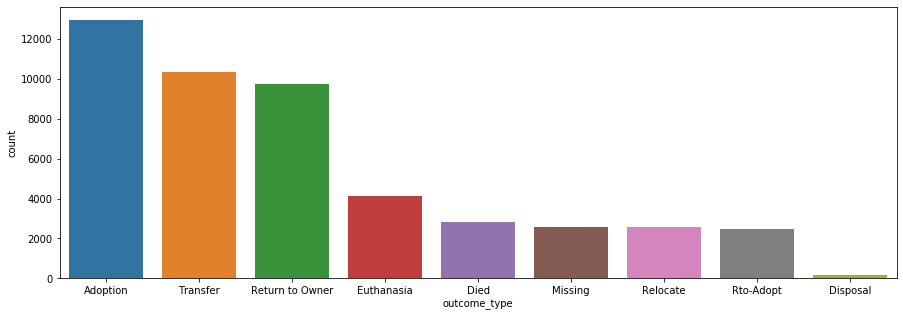

In [69]:
# The most often outcomes is Adoption and Transfer and then Return to Owner
plt.figure(figsize=(15,5))
sns.countplot(x='outcome_type',order=animals['outcome_type'].value_counts().index, data=animals)
plt.show()

In [70]:
animals['age_upon_intake_(years)']=round(animals['age_upon_intake_(years)'])

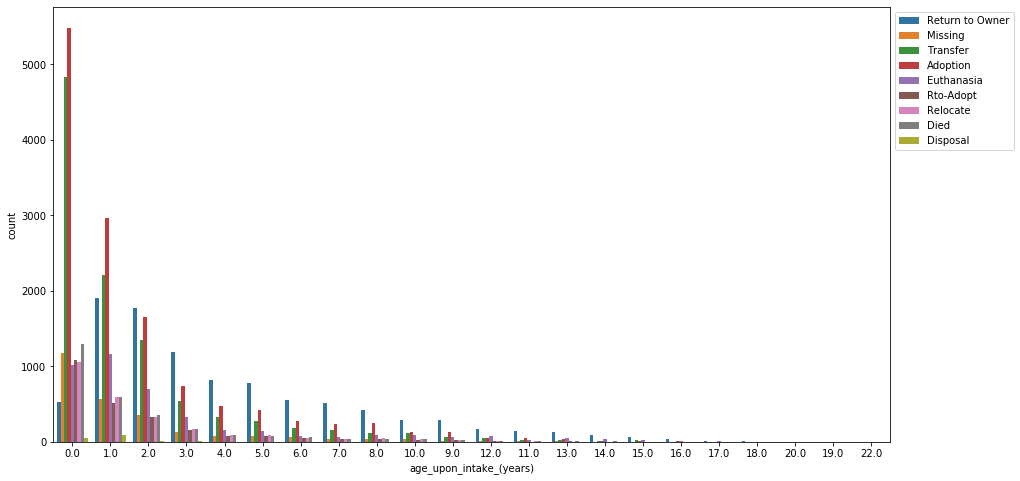

In [71]:
#visualizing age_upon_intake

#print(animals['age_upon_intake_(years)'].value_counts())

plt.figure(figsize=(15,8))
sns.countplot(x='age_upon_intake_(years)', 
              order=animals['age_upon_intake_(years)'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


#we can figure out that more adoption and Transfer takes place if age is <=1 year

In [72]:
#keeping this in mind, lets keep age_upon_outcome_(year) and drop other associated columns
animals=animals.drop(['age_upon_intake_(days)', 'age_upon_intake_age_group','age_upon_intake'],1)

animals2=animals2.drop(['age_upon_intake_(days)', 'age_upon_intake_age_group','age_upon_intake'],1)

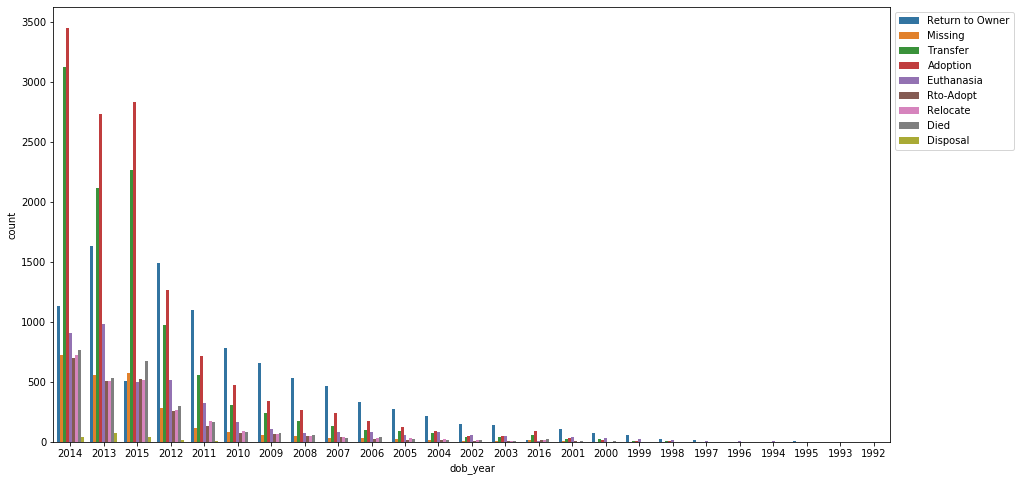

In [73]:
#visualizing dob_year

#print(animals['dob_year'].value_counts())

plt.figure(figsize=(15,8))
sns.countplot(x='dob_year', 
              order=animals['dob_year'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


We can see that 2013-2015 has been more adoption otherwise more Return to owner

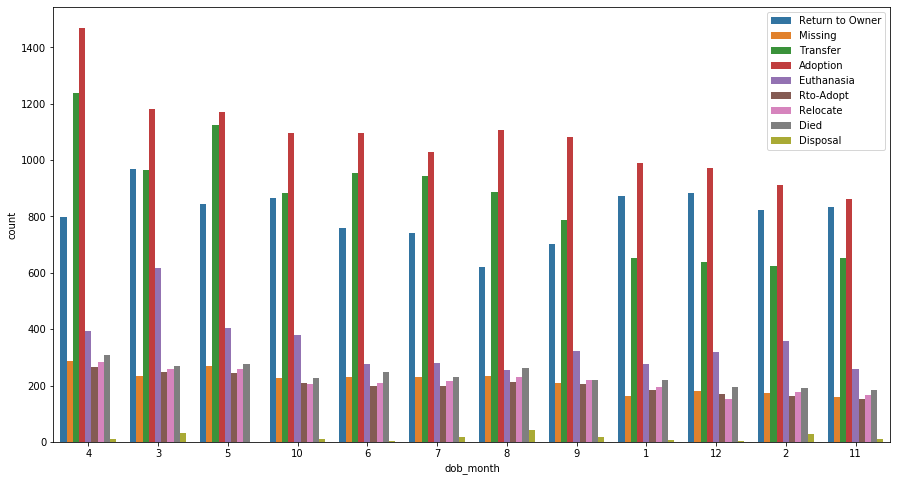

In [74]:
#visualizing dob_month
plt.figure(figsize=(15,8))
sns.countplot(x='dob_month', 
              order=animals['dob_month'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

This doesn't give any information so we can drop this

In [75]:
#hence dropping dob_month and date_of_birth
animals=animals.drop(['dob_month','date_of_birth'],1)

animals2=animals2.drop(['dob_month','date_of_birth'],1)

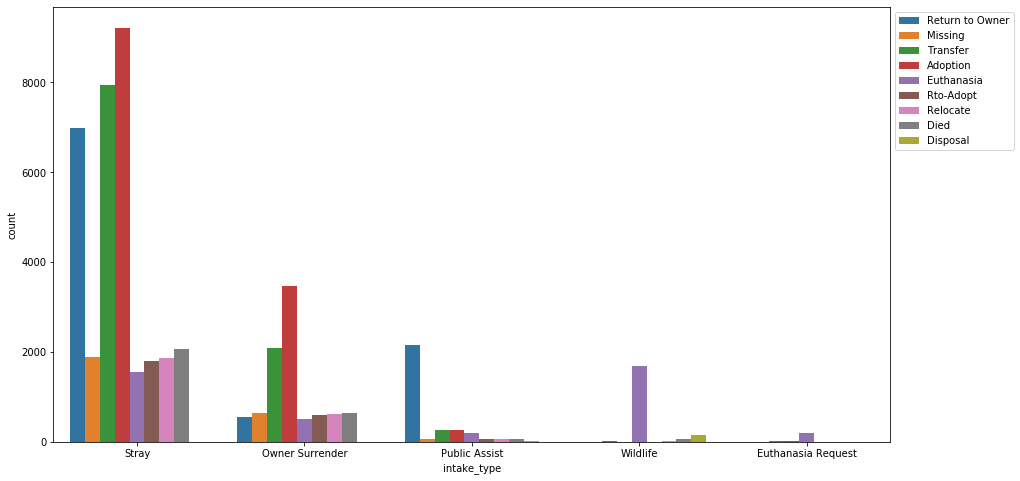

In [76]:
#visualizing intake_type
plt.figure(figsize=(15,8))
sns.countplot(x='intake_type', 
              order=animals['intake_type'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

We see that most of Stray and own surrender are adopted whereas Public assist as returned to the owner

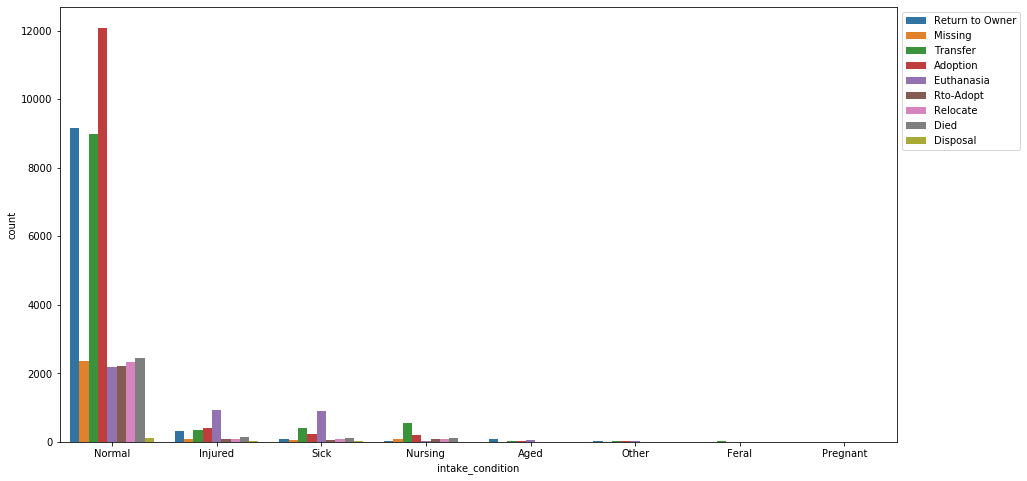

In [77]:
#visualizing intake_condition
plt.figure(figsize=(15,8))
sns.countplot(x='intake_condition', 
              order=animals['intake_condition'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Most of injured and Sick are in Euthanasia

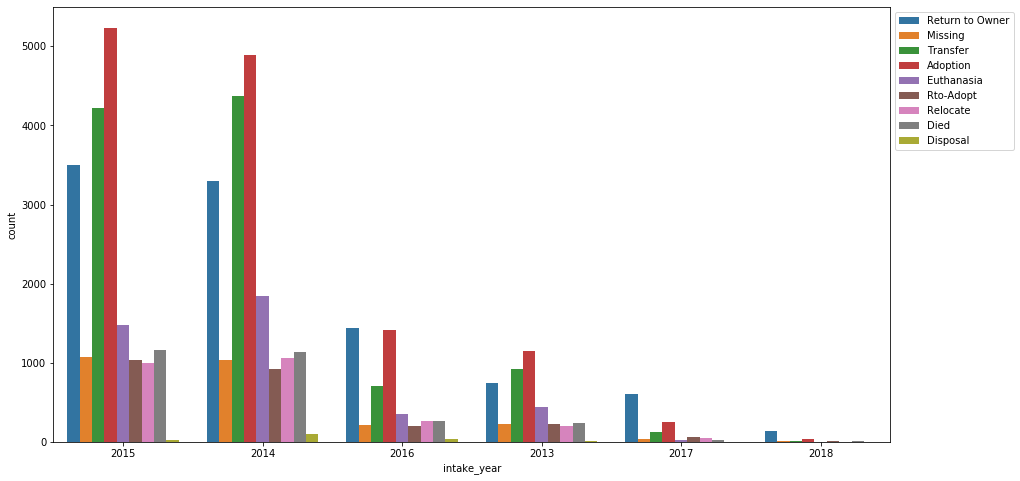

In [78]:
#visualizing intake_year
plt.figure(figsize=(15,8))
sns.countplot(x='intake_year', 
              order=animals['intake_year'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

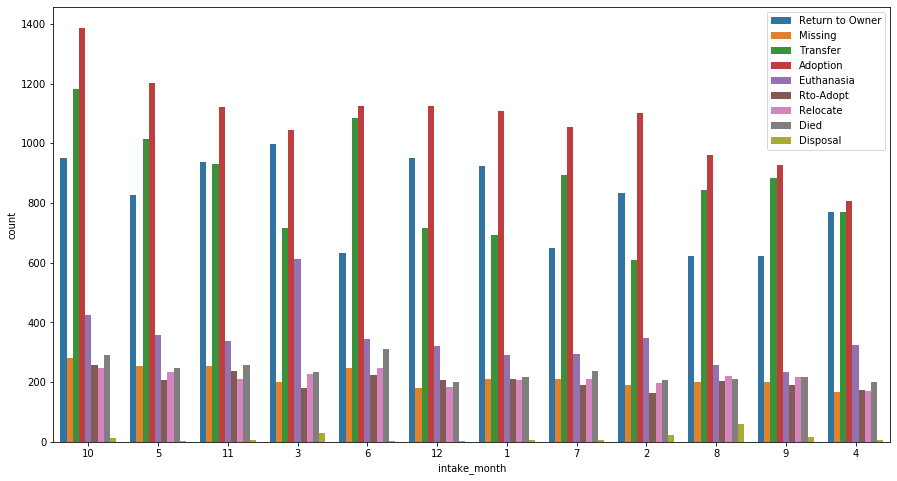

In [79]:
#visualizing intake_month
plt.figure(figsize=(15,8))
sns.countplot(x='intake_month', 
              order=animals['intake_month'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

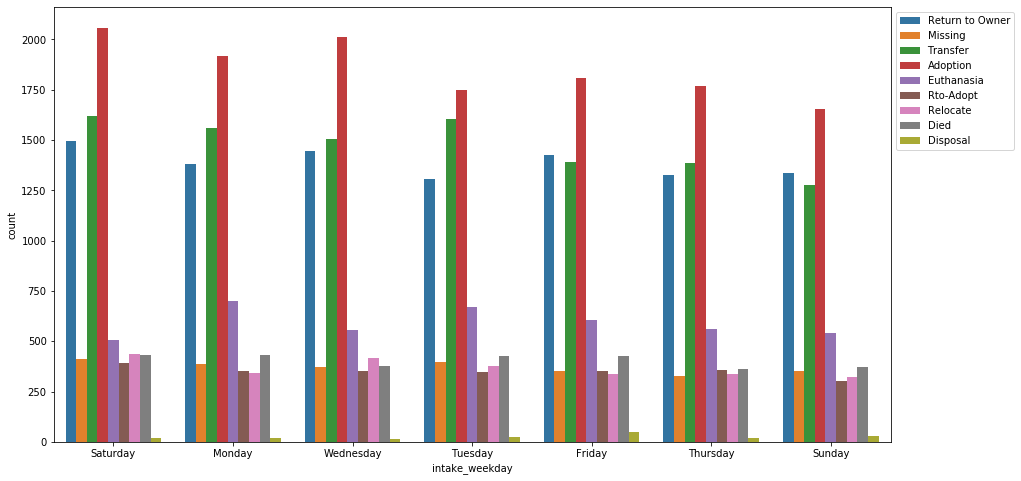

In [80]:
#visualizing intake_weekday
plt.figure(figsize=(15,8))
sns.countplot(x='intake_weekday', 
              order=animals['intake_weekday'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

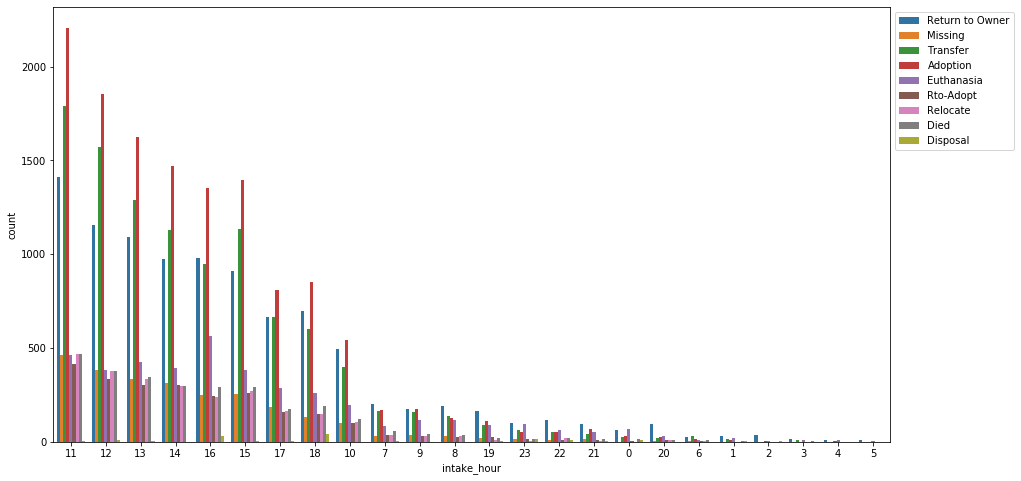

In [81]:
#visualizing intake_hour
plt.figure(figsize=(15,8))
sns.countplot(x='intake_hour', 
              order=animals['intake_hour'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [82]:
#We do not see any valuable information from these columns so they all can be dropped
animals=animals.drop(['intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour','animal_id_outcome'],1)

animals2=animals2.drop(['intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour','animal_id_outcome'],1)

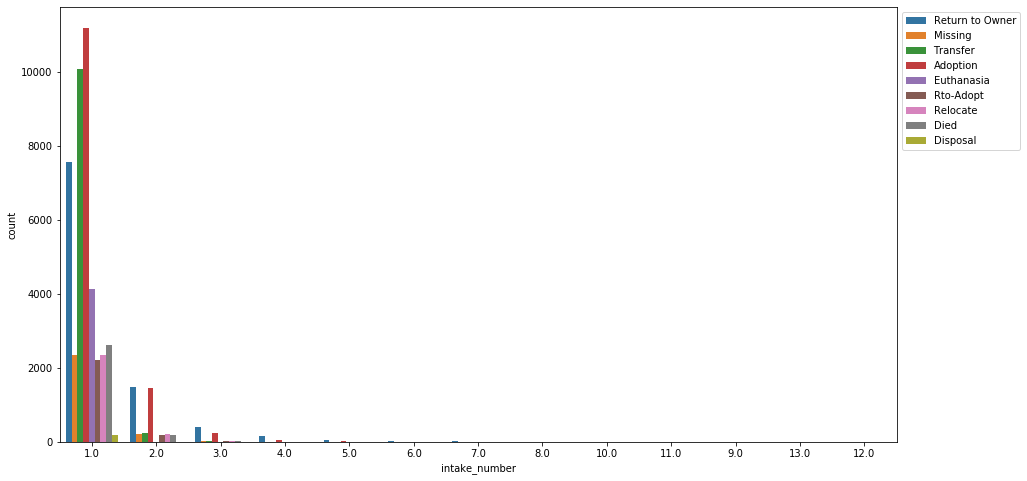

In [83]:
#visualizing intake_number
plt.figure(figsize=(15,8))
sns.countplot(x='intake_number', 
              order=animals['intake_number'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

It can be dropped as there are no trends

In [84]:
animals['intake_number'].corr(animals['outcome_number'])

0.9999999999999998

Since the correlation is so high one can be dropped

In [85]:
#drop count as it is always=1
animals=animals.drop(['intake_number','outcome_number','count'],1)

animals2=animals2.drop(['intake_number','outcome_number','count'],1)

In [86]:
#dropping time_in_shelter
animals=animals.drop(['time_in_shelter'],1)

animals2=animals2.drop(['time_in_shelter'],1)

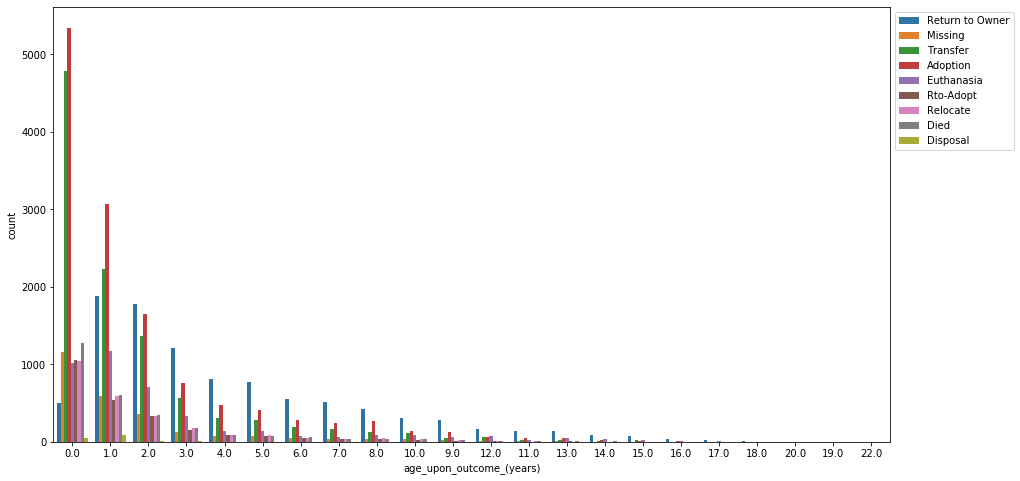

In [87]:
#age_upon_outcome_year
animals['age_upon_outcome_(years)']=round(animals['age_upon_outcome_(years)'])
plt.figure(figsize=(15,8))
sns.countplot(x='age_upon_outcome_(years)', 
              order=animals['age_upon_outcome_(years)'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [88]:
#keep age_upon_outcome_year and drop rest related
animals=animals.drop(['age_upon_outcome','age_upon_outcome_(days)','age_upon_outcome_age_group'],1)

animals2=animals2.drop(['age_upon_outcome','age_upon_outcome_(days)','age_upon_outcome_age_group'],1)

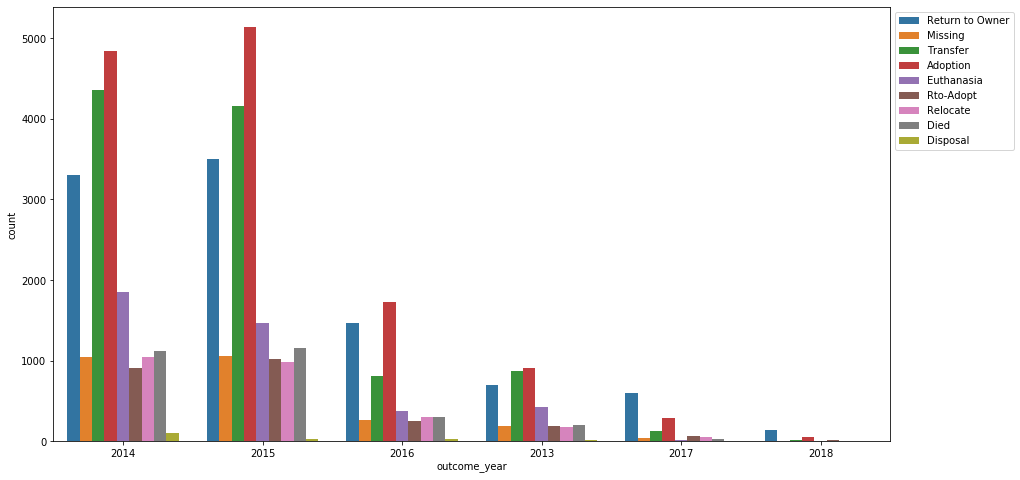

In [89]:
#outcome_year
plt.figure(figsize=(15,8))
sns.countplot(x='outcome_year', 
              order=animals['outcome_year'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

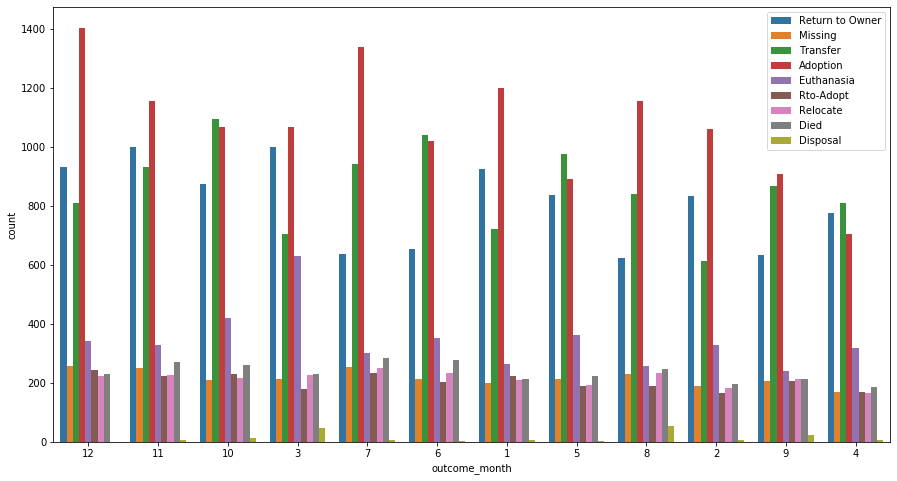

In [90]:
#outcome_month
plt.figure(figsize=(15,8))
sns.countplot(x='outcome_month', 
              order=animals['outcome_month'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

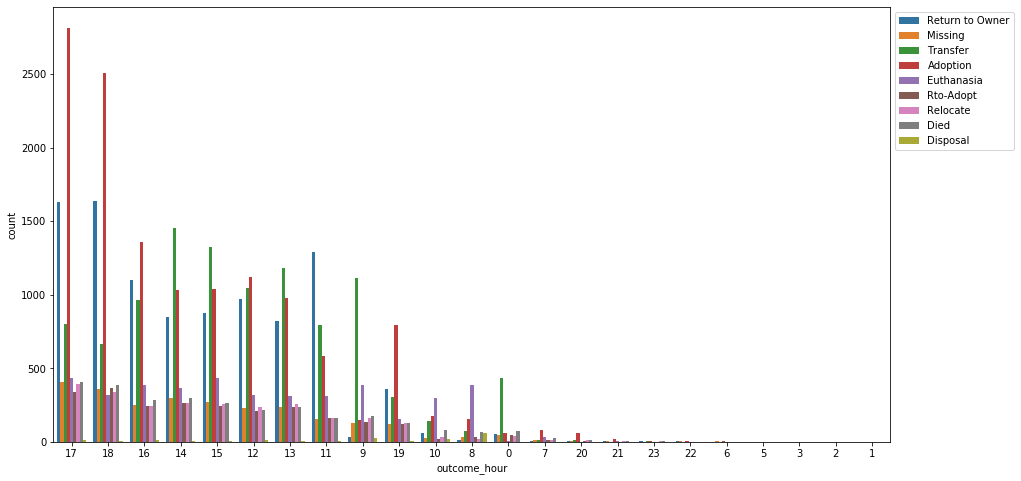

In [91]:
#outcome_hour
plt.figure(figsize=(15,8))
sns.countplot(x='outcome_hour', 
              order=animals['outcome_hour'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

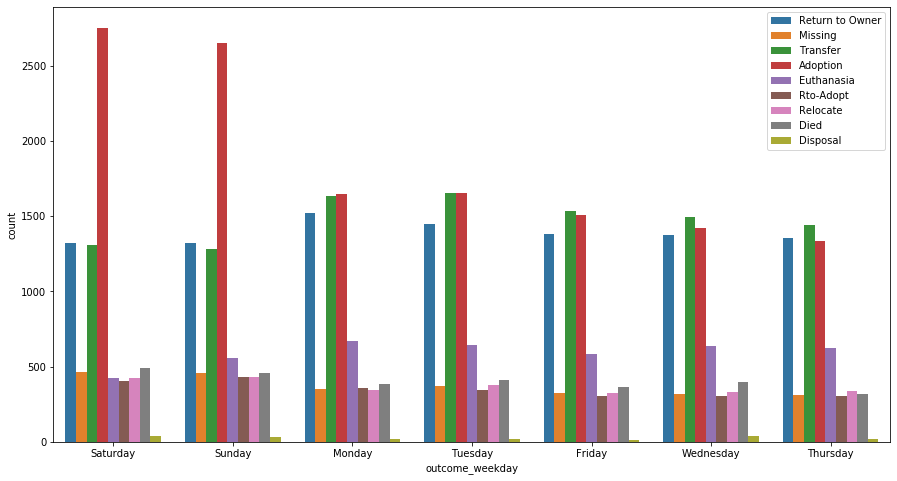

In [92]:
#outcome_weekday
plt.figure(figsize=(15,8))
sns.countplot(x='outcome_weekday', 
              order=animals['outcome_weekday'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Lets keep outcome_weekday and outcome_hour and drop the rest

In [93]:
animals=animals.drop(['outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear'],1)

animals2=animals2.drop(['outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear'],1)

In [94]:
animals.columns.values

array(['dob_year', 'animal_type', 'breed', 'color', 'intake_condition',
       'intake_type', 'sex_upon_intake', 'age_upon_intake_(years)',
       'time_in_shelter_days', 'sex_upon_outcome',
       'age_upon_outcome_(years)', 'outcome_weekday', 'outcome_hour',
       'outcome_type'], dtype=object)

In [95]:
animals.head()

,dob_year,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years),outcome_weekday,outcome_hour,outcome_type
0,2007,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,0.588194,Neutered Male,10.0,Thursday,0,Return to Owner
1,2007,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,1.259722,Neutered Male,7.0,Saturday,16,Return to Owner
2,2007,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,1.113889,Neutered Male,6.0,Saturday,17,Return to Owner
3,2004,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,4.970139,Neutered Male,10.0,Monday,15,Missing
4,1997,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,0.119444,Neutered Male,16.0,Saturday,11,Return to Owner


In [96]:
#Gender
def General_gender(x):
    if x == 'Female':
        return 'Female'
    elif x == 'Male':
        return 'Male'
    else:
        return 'unknown'
    
animals['gender']= animals['sex_upon_outcome'].str.split(' ').str.get(1) #separate general gender
animals['gender'] = animals['gender'].apply(General_gender) 


animals2['gender']= animals2['sex_upon_outcome'].str.split(' ').str.get(1) #separate general gender
animals2['gender'] = animals2['gender'].apply(General_gender) 

In [97]:
#removing gender from sex_upon_outcome
def General_gender1(x):
    if x == 'Neutered':
        return 'Neutered'
    elif x == 'Spayed':
        return 'Spayed'
    elif x=='Intact':
        return 'Intact'
    else:
        return 'unknown'
    
animals['sex_upon_outcome']= animals['sex_upon_outcome'].str.split(' ').str.get(0) #separate general gender
animals['sex_upon_outcome'] = animals['sex_upon_outcome'].apply(General_gender1) 

animals2['sex_upon_outcome']= animals2['sex_upon_outcome'].str.split(' ').str.get(0) #separate general gender
animals2['sex_upon_outcome'] = animals2['sex_upon_outcome'].apply(General_gender1) 

In [98]:
#removing gender from sex_upon_intake
def General_gender2(x):
    if x == 'Neutered':
        return 'Neutered'
    elif x == 'Spayed':
        return 'Spayed'
    elif x=='Intact':
        return 'Intact'
    else:
        return 'unknown'
    
animals['sex_upon_intake']= animals['sex_upon_intake'].str.split(' ').str.get(0) #separate general gender
animals['sex_upon_intake'] = animals['sex_upon_intake'].apply(General_gender2) 

animals2['sex_upon_intake']= animals2['sex_upon_intake'].str.split(' ').str.get(0) #separate general gender
animals2['sex_upon_intake'] = animals2['sex_upon_intake'].apply(General_gender2) 

In [99]:
animals.head()

,dob_year,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years),outcome_weekday,outcome_hour,outcome_type,gender
0,2007,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered,10.0,0.588194,Neutered,10.0,Thursday,0,Return to Owner,Male
1,2007,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered,7.0,1.259722,Neutered,7.0,Saturday,16,Return to Owner,Male
2,2007,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered,6.0,1.113889,Neutered,6.0,Saturday,17,Return to Owner,Male
3,2004,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered,10.0,4.970139,Neutered,10.0,Monday,15,Missing,Male
4,1997,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered,16.0,0.119444,Neutered,16.0,Saturday,11,Return to Owner,Male


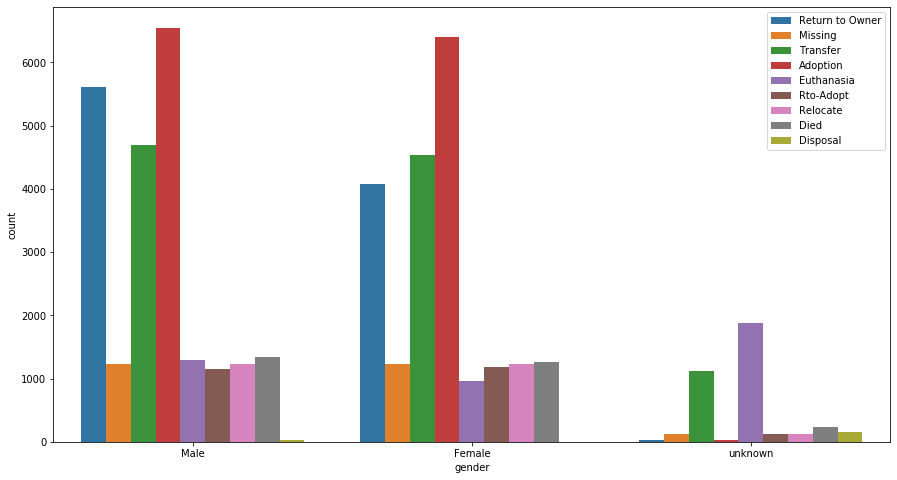

In [100]:
#visualizing gender
plt.figure(figsize=(15,8))
sns.countplot(x='gender', 
              order=animals['gender'].value_counts().index, 
              hue='outcome_type',
              data=animals)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [101]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dob_year                  47803 non-null  int64  
 1   animal_type               47803 non-null  object 
 2   breed                     47803 non-null  object 
 3   color                     47803 non-null  object 
 4   intake_condition          47803 non-null  object 
 5   intake_type               47803 non-null  object 
 6   sex_upon_intake           47803 non-null  object 
 7   age_upon_intake_(years)   47803 non-null  float64
 8   time_in_shelter_days      47803 non-null  float64
 9   sex_upon_outcome          47803 non-null  object 
 10  age_upon_outcome_(years)  47803 non-null  float64
 11  outcome_weekday           47803 non-null  object 
 12  outcome_hour              47803 non-null  int64  
 13  outcome_type              47803 non-null  object 
 14  gender

# Transformation to Numeric Values

In [102]:
le = LabelEncoder()
col_num = animals.select_dtypes(include=['O']).columns.values
col_num_list = list(col_num)
col_num_list.remove('outcome_type')

In [103]:
for col in col_num_list:
    animals[col] = le.fit_transform(animals[col])
    animals2[col] = le.fit_transform(animals2[col])
print(animals.head())

   dob_year  animal_type  breed  color  intake_condition  intake_type  \
0      2007            2   1707    441                 3            3   
1      2007            2   1707    441                 3            2   
2      2007            2   1707    441                 3            2   
3      2004            2    718    375                 3            1   
4      1997            2   1618    154                 2            2   

   sex_upon_intake  age_upon_intake_(years)  time_in_shelter_days  \
0                1                     10.0              0.588194   
1                1                      7.0              1.259722   
2                1                      6.0              1.113889   
3                1                     10.0              4.970139   
4                1                     16.0              0.119444   

   sex_upon_outcome  age_upon_outcome_(years)  outcome_weekday  outcome_hour  \
0                 1                      10.0                4    

In [104]:
animals.head()

,dob_year,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years),outcome_weekday,outcome_hour,outcome_type,gender
0,2007,2,1707,441,3,3,1,10.0,0.588194,1,10.0,4,0,Return to Owner,1
1,2007,2,1707,441,3,2,1,7.0,1.259722,1,7.0,2,16,Return to Owner,1
2,2007,2,1707,441,3,2,1,6.0,1.113889,1,6.0,2,17,Return to Owner,1
3,2004,2,718,375,3,1,1,10.0,4.970139,1,10.0,1,15,Missing,1
4,1997,2,1618,154,2,2,1,16.0,0.119444,1,16.0,2,11,Return to Owner,1


In [105]:
X=animals.drop(['outcome_type'],1)
Y=animals['outcome_type']

In [106]:
animals['outcome_type'].value_counts()

Adoption           12967
Transfer           10345
Return to Owner     9718
Euthanasia          4144
Died                2829
Missing             2599
Relocate            2573
Rto-Adopt           2450
Disposal             178
Name: outcome_type, dtype: int64

In [107]:
#We can see that the data is unbalanced
#not considerong Disposal since it very less
X=animals
#try upsampling
from sklearn.utils import resample
Adoption = X[X['outcome_type']=='Adoption']
Transfer= X[X['outcome_type']=='Transfer']
Return= X[X['outcome_type']=='Return to Owner']
Euthanasia= X[X['outcome_type']=='Euthanasia']
Died= X[X['outcome_type']=='Died']
Missing= X[X['outcome_type']=='Missing']
Relocate= X[X['outcome_type']=='Relocate']
RtoAdopt= X[X['outcome_type']=='Rto-Adopt']
Disposal= X[X['outcome_type']=='Disposal']

Adoption1= resample(Adoption,replace=True,n_samples=7000)
Return1= resample(Return,replace=True,n_samples=7000)
Transfer1= resample(Transfer,replace=True,n_samples=7000)
Euthanasia1 = resample(Euthanasia,replace=True,n_samples=7000) # match number in majority class
Died1 = resample(Died,replace=True,n_samples=7000)
Missing1 = resample(Missing,replace=True,n_samples=7000)
Relocate1 = resample(Relocate,replace=True,n_samples=7000)
RtoAdopt1 = resample(RtoAdopt,replace=True,n_samples=7000)
Disposal1 = resample(Disposal,replace=True,n_samples=2000)

upsampled = pd.concat([Adoption1,Transfer1,Return1,Euthanasia1,Died1,Relocate1,RtoAdopt1,Missing1,Disposal1])

In [108]:
upsampled['outcome_type'].value_counts()

Missing            7000
Rto-Adopt          7000
Adoption           7000
Euthanasia         7000
Relocate           7000
Died               7000
Transfer           7000
Return to Owner    7000
Disposal           2000
Name: outcome_type, dtype: int64

In [109]:
X=upsampled.drop(['outcome_type'],1)
Y=upsampled['outcome_type']
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 
z=0
for train_index, test_index in kf.split(X):
      #print("Train:", train_index, "Validation:",test_index)
      Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index] 
      ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]
      z+=1
print(z)

100


In [110]:
X=upsampled.drop(['outcome_type'],1)
Y=upsampled['outcome_type']
#PCA
from sklearn.decomposition import PCA
pca = PCA()

Xtrain = pca.fit_transform(Xtrain)
animals2 = pca.transform(animals2)
Xtest=pca.transform(Xtest)

In [111]:
animals2

array([[-4.30186171e+02, -7.78223133e+01, -1.14296037e+01, ...,
         1.26004962e-01, -5.75620460e-01,  3.70103102e-03],
       [-4.30129915e+02, -7.79829731e+01,  1.75888480e+01, ...,
         8.68606645e-02, -3.78789131e-01, -4.91623052e-02],
       [-4.30141047e+02, -7.79852007e+01,  1.58742766e+01, ...,
         1.03285895e-01, -6.62376726e-01, -4.49074067e-02],
       ...,
       [-7.62388588e+02, -8.21743852e+01, -1.59624737e+01, ...,
        -8.25791941e-01,  1.47042154e-01, -8.18933964e-03],
       [-2.62531939e+02, -1.37690696e+02, -1.55464479e+01, ...,
        -8.01695296e-01,  2.11511123e-01, -2.97884946e-01],
       [-6.70377944e+02, -8.32494239e+01, -1.52627525e+01, ...,
        -5.15053380e-01,  4.38832217e-01,  2.39939300e-02]])

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xtrain, ytrain)
rf_pred=rf.predict(Xtest)
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(ytest,rf_pred))


                 precision    recall  f1-score   support

       Adoption       0.71      0.75      0.73       679
           Died       0.88      0.90      0.89       692
       Disposal       0.99      1.00      1.00       208
     Euthanasia       0.93      0.94      0.94       696
        Missing       0.89      0.89      0.89       714
       Relocate       0.89      0.90      0.89       683
Return to Owner       0.90      0.89      0.89       686
      Rto-Adopt       0.92      0.93      0.92       736
       Transfer       0.79      0.69      0.74       706

       accuracy                           0.87      5800
      macro avg       0.88      0.88      0.88      5800
   weighted avg       0.87      0.87      0.87      5800



In [113]:
res=rf.predict(animals2)
result=pd.DataFrame()
result['animal_id_outcome']=ids
result['outcome_type']=res
result.to_csv('result2.csv',index=False) 